In [1]:
import numpy as np
import scipy.optimize as sco
import matplotlib as mpl
import matplotlib.pyplot as plt
import sl_py_tools.matplotlib_tricks as mpt


In [2]:
import complex_synapse.optimise.shorten as sh
from complex_synapse.optimise.shorten import Y_STAR, A_STAR

In [3]:
def limits_s(num, *args, **kwds):
    return sh.beta_to_s(np.array(sh.limits(num, *args, **kwds)))

In [4]:
mpt.rc_fonts()
mpt.rc_colours()

## Tests

In [5]:
np.r_[1 / limits_s(4, True), 1 / limits_s(6, True)]

lo:converged; eps=1.00
 f(x_0)=0.13; f(x_1)=-62439.11; f(x)=0.00
hi:converged; eps=0.00
 f(x_0)=0.12; f(x_1)=-69468.96; f(x)=-0.00
lo:converged; eps=1.00
 f(x_0)=0.22; f(x_1)=-2067.03; f(x)=0.00
hi:converged; eps=0.00
 f(x_0)=0.19; f(x_1)=-3301.66; f(x)=0.00


array([1.281, 2.732, 3.562, 8.758])

In [4]:
x = .7
sh.uniform(x, sh.num_star(x)), sh.uni_star(x), Y_STAR - np.tanh(Y_STAR/2) * np.cosh(Y_STAR)

(1.051422594567153, 1.0514225945671531, 6.661338147750939e-16)

## For paper

In [5]:
(2 * Y_STAR**2), 1 / (2 * Y_STAR**2), (2 * np.sinh(Y_STAR / 2)**2), 1 / (2 * np.sinh(Y_STAR / 2)**2)

(4.533267755650629,
 0.22059142629585904,
 1.3642300206961724,
 0.7330142166859044)

In [6]:
Y_STAR, (A_STAR * np.sqrt(2))

(1.5055344160215383, 0.5420285775618274)

## Plots

(0.0, 5.0)

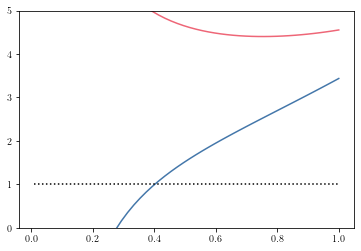

In [7]:
betas = (np.linspace(0.01, 1, 50))
epss = sh.eps_stars(betas, 10)
plt.plot(betas, epss[0], betas, epss[1], betas, np.ones_like(betas), 'k:')
plt.ylim(0, 5)

In [8]:
betas = np.linspace(0.01, 0.76, 50)
lo, hi = sh.lower(betas, 6), sh.upper(betas, 6)
sh.beta_star(4), sh.beta_star(6), sh.beta_star(8)

(0.7527672080107691, 0.5018448053405128, 0.37638360400538456)

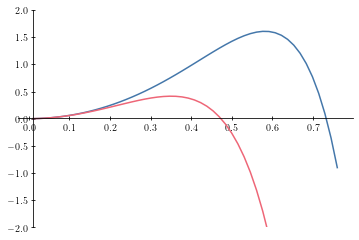

In [10]:
plt.plot(betas, lo, betas, hi)
plt.ylim(-2, 2)
mpt.centre_spines(None, 0.01, 0.01, centre_tick='none')

In [6]:
1/limits_s(2), 1/limits_s(4), 1/limits_s(6), 1/limits_s(8), 1/limits_s(10)

(array([0.01 , 0.733]),
 array([1.281, 2.732]),
 array([3.562, 8.758]),
 array([ 7.156, 16.412]),
 array([12.277, 25.78 ]))

In [7]:
s, a, env = sh.envelopes(10, 50)
s_env, a_env = sh.env_ravel(s, env)
appx = sh.env_approx(s_env)

In [8]:
gaps = sh.gaps(10, 20)
t_gaps = 1 / gaps[0]
r_gaps = gaps[1] / gaps[2]
snr_gaps = gaps[1] * gaps[0]

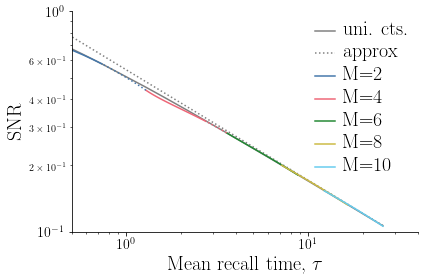

In [10]:
fig1, ax = plt.subplots()
ax.loglog(1 / s_env, s_env * a_env, label="uni. cts.", color='grey')
ax.loglog(1 / s_env, s_env * appx, ':', label="approx", color='grey')
for num, ss, aa in zip(range(2, 12, 2), s, a):
    # env = np.interp(ss, s_env, a_env)
    ax.loglog(1 / ss, aa * ss, label=f"M={num}")
for num, (tt, snr) in enumerate(zip(t_gaps, snr_gaps)):
    ax.loglog(tt, snr, ':', color=f"C{num}")
plt.legend(loc=1)
ax.set_xlim(0.5, 40)
ax.set_ylim(0.1, 1)
ax.set_xlabel("Mean recall time, $\\tau$")
ax.set_ylabel("SNR")
mpt.clean_axes(ax)


In [7]:
np.stack([sh.limits(n) for n in range(2, 12, 2)])

array([[5.298, 1.506],
       [1.282, 1.173],
       [0.669, 0.619],
       [0.447, 0.425],
       [0.335, 0.323]])

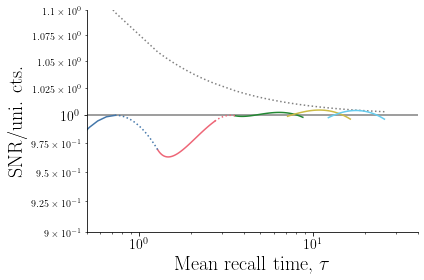

In [11]:
fig2, ax = plt.subplots()
ax.loglog(1 / s_env, appx / a_env, ':', label="approx", color='grey')
ax.loglog([0.5, 40], [1, 1], color='grey')
for num, ss, aa, ee in zip(range(2, 12, 2), s, a, env):
    ax.loglog(1 / ss, aa /ee, label=f"M={num}")
for num, (tt, rr) in enumerate(zip(t_gaps, r_gaps)):
    ax.loglog(tt, rr, ':', color=f"C{num}")
ax.set_xlim(0.5, 40)
ax.set_ylim(0.9, 1.1)
ax.set_xlabel("Mean recall time, $\\tau$")
ax.set_ylabel("SNR/uni. cts.")
mpt.clean_axes(ax)

In [ ]:
fig1.savefig('../../Notes/Figures/shorten_opt.pdf')

In [ ]:
fig2.savefig('../../Notes/Figures/shorten_ratio.pdf')